# PROJECT: Classifying Cow’s activities

## AIM : Classify Cow’s activities into 9 categories based on Data collected from IMU SENSORS

### Data
#### IMU Data (Accelerometer, Gyroscope, Magnetometer)
#### What is IMU?
Inertial measurement unit, used to describe a collection of measurement 
tools, when installed in some device, catches movement with the help of 
accelerometer, gyroscope and magnetometer, in 3d space.

#### Variable names:-
* acc_x,acc_y,acc_z: accelerometer output for all 3 dimensions movement.
* gyr_x,gyr_y,gyr_z: gyroscope outputs, it measures rotation, rotation rate 
(angular velocity).
* mag_x,mag_y,mag_z: magnetometer outputs, catches magnetic field 
around the device.
* All three (Acc, Gyr, Mag) gives output in different SI Units i.e The scale for all three are different, so Data must be normalized

##### Classes and their Encoded values:-
* eating = 1
* drinking = 2
* walking = 3
* standing =4
* lying = 5
* ruminating standing = 6
* ruminating lying = 7
* grooming = 8
* idle/other = 9

#### Notebook Contents :
1. Dataset Information
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Modeling
5. Conclusion

### 1. Dataset Information

In [3]:
#importing Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

#removing warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading each files as data frames
drink = pd.read_csv(r"Classify cow positions using Machine Learning\D2_train.csv")
eating = pd.read_csv(r"Classify cow positions using Machine Learning\E1_train.csv")
walking  = pd.read_csv(r"Classify cow positions using Machine Learning\W3_train.csv")
grooming = pd.read_csv(r"Classify cow positions using Machine Learning\G8_train.csv")
idle = pd.read_csv(r"Classify cow positions using Machine Learning\I9_train.csv")
lying = pd.read_csv(r"Classify cow positions using Machine Learning\L5_train.csv")
ruminating_lying = pd.read_csv(r"Classify cow positions using Machine Learning\RL7_train.csv")
ruminating_standing = pd.read_csv(r"Classify cow positions using Machine Learning\RS6_train.csv")
standing = pd.read_csv(r"Classify cow positions using Machine Learning\S4_train.csv")

In [5]:
#concatenating all the datasets and stored in variable df 
df = pd.concat([drink,eating,walking,grooming,idle,lying,ruminating_lying,ruminating_standing,standing]) 

In [6]:
#preview first rows of dataset
df.head()

time     acc_x     acc_y     acc_z      gyr_x      gyr_y      gyr_z  \
0  1628079761 -0.187012  1.071289  0.321289   7.934570 -40.527344  17.028809   
1  1628079761 -0.137207  1.099121  0.294922   0.305176 -44.677734  15.930176   
2  1628079761  0.028320  1.053711  0.215820  -9.216309 -42.541504  10.681152   
3  1628079761  0.151856  0.960938  0.206543 -15.502930 -31.433105   4.943848   
4  1628079761  0.171387  0.883301  0.247070  -0.061035 -27.832031  -2.685547   

   mag_x   mag_y  mag_z  label  
0 -526.5  1437.0  513.0      2  
1 -528.0  1423.5  495.0      2  
2 -510.0  1419.0  484.5      2  
3 -529.5  1428.0  496.5      2  
4 -526.5  1420.5  505.5      2

### 2. Exploratory Data Analysis

In [7]:
#check number of rows and columns
df.shape

(12263524, 11)

In [8]:
#finding null values
df.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

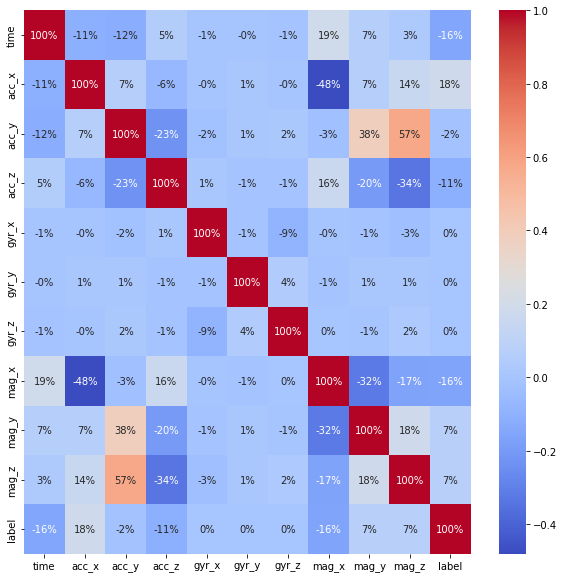

In [9]:
#checking the correlation between the features
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

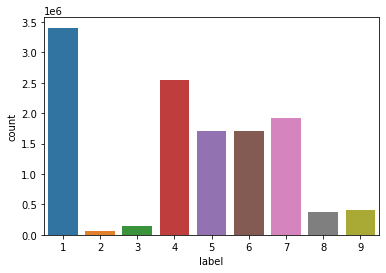

In [10]:
#understanding target variable
sns.countplot(df['label'])

In [97]:
#checking the percentage of each class of the target variable present in the data
(df['label'].value_counts()/len(df['label']))*100


1    27.770990
4    20.710246
7    15.729312
5    13.957546
6    13.892279
9     3.304621
8     3.005718
3     1.185377
2     0.443910
Name: label, dtype: float64

##### Observation:
The target variables are imbalanced!

In [11]:
#checking for categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263524 entries, 0 to 2539805
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 GB


#### Observation:
1. Missing Data : we don't have any missing data.
2. There is no object type data, all are either int or float.

In [12]:
#descriptive stats
df.describe().T

count          mean            std           min           25%  \
time   12263524.0  1.628243e+09  120566.211087  1.628067e+09  1.628106e+09   
acc_x  12263524.0 -2.807402e-02       0.262217 -1.599756e+01 -2.182617e-01   
acc_y  12263524.0  6.211683e-01       0.708480 -1.314160e+01  8.281250e-01   
acc_z  12263524.0  1.081455e-01       0.188861 -1.599121e+01  3.173830e-02   
gyr_x  12263524.0  8.722215e-01      12.824807 -1.999756e+03 -2.014160e+00   
gyr_y  12263524.0 -1.837340e+00      20.141508 -1.998779e+03 -5.676270e+00   
gyr_z  12263524.0 -6.375345e-01      10.300934 -1.999756e+03 -2.685547e+00   
mag_x  12263524.0 -2.934089e+02     273.614110 -1.534500e+03 -4.635000e+02   
mag_y  12263524.0  4.300977e+02     596.972003 -1.057500e+03 -4.950000e+01   
mag_z  12263524.0  2.037158e+02     438.299636 -1.152000e+03  6.900000e+01   
label  12263524.0  4.320899e+00       2.417436  1.000000e+00  1.000000e+00   

                50%           75%           max  
time   1.628312e+09  1.628335e+09  1.628421e+09  
acc_x -2.490230e-02  1.616211e-01  1.051514e+01  
acc_y  9.370118e-01  9.736329e-01  1.182617e+01  
acc_z  1.230469e-01  2.006836e-01  1.599854e+01  
gyr_x  8.544922e-01  3.723145e+00  1.999756e+03  
gyr_y -1.892090e+00  1.892090e+00  1.999939e+03  
gyr_z -6.103516e-01  1.464844e+00  1.973511e+03  
mag_x -2.535000e+02 -1.260000e+02  7.920000e+02  
mag_y  1.395000e+02  9.795000e+02  1.918500e+03  
mag_z  3.165000e+02  5.520000e+02  1.179000e+03  
label  4.000000e+00  6.000000e+00  9.000000e+00

In [13]:
#checking for outliers using boxplot
fig = plt.figure(figsize = (6,6))

#calling the boxplot
sns.boxplot(data = df, linewidth = 1) #linewidth -- space between each inforamation

plt.xticks(rotation = 'horizontal')
plt.show()

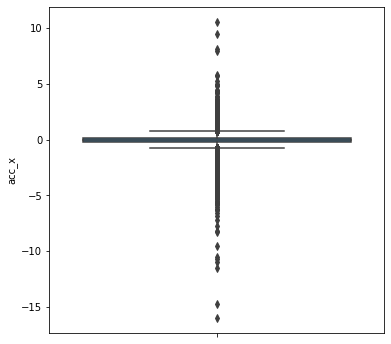

In [14]:
#checking the outliers for acc_x using boxplot
fig = plt.figure(figsize = (6,6))

#calling the boxplot
sns.boxplot(data =df,y = "acc_x")
plt.xticks(rotation = "vertical")
plt.show()

In [15]:
#splitting the x and y variables to different datasets
x = df.drop('label', axis = 1) #independent features  
#x = df.iloc[:,:-1]

y = df[['label']] #dependent features
#y = df.iloc[:,-1]

In [16]:
x.head()

time     acc_x     acc_y     acc_z      gyr_x      gyr_y      gyr_z  \
0  1628079761 -0.187012  1.071289  0.321289   7.934570 -40.527344  17.028809   
1  1628079761 -0.137207  1.099121  0.294922   0.305176 -44.677734  15.930176   
2  1628079761  0.028320  1.053711  0.215820  -9.216309 -42.541504  10.681152   
3  1628079761  0.151856  0.960938  0.206543 -15.502930 -31.433105   4.943848   
4  1628079761  0.171387  0.883301  0.247070  -0.061035 -27.832031  -2.685547   

   mag_x   mag_y  mag_z  
0 -526.5  1437.0  513.0  
1 -528.0  1423.5  495.0  
2 -510.0  1419.0  484.5  
3 -529.5  1428.0  496.5  
4 -526.5  1420.5  505.5

In [17]:
y.head()

label
0      2
1      2
2      2
3      2
4      2

## checking for outliers

#a function to plot the outliers for the given column name
def identify_outliers(df, column_name):
    fig = plt.figure(figsize=(6,8))
    sns.boxplot(data = x, y = column_name)
plt.show()

#plotting for mag_x
identify_outliers(x, 'mag_x')

### identifying outliers

In [18]:
#defining a variable named column_name and giving it all the column names except label
column_name = ['time','acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x','mag_y', 'mag_z']

In [19]:
# Using a for loop inside a function to get the box plots(seaborn) of all the columns
def identify_outliers(give_df_name, give_column_name):
    for i in column_name:
        fig = plt.figure(figsize=(6,8))
        sns.boxplot(data = x, y = i)
plt.show()

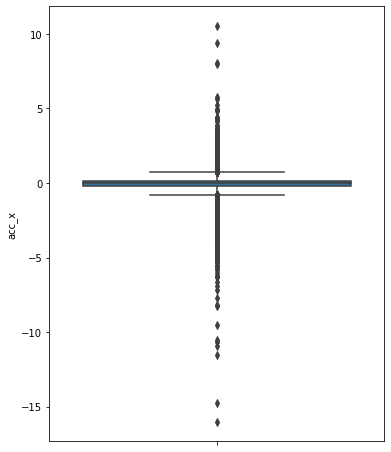

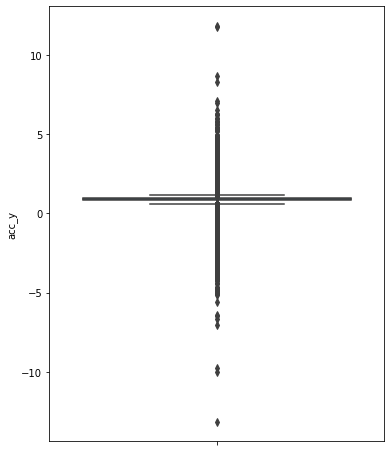

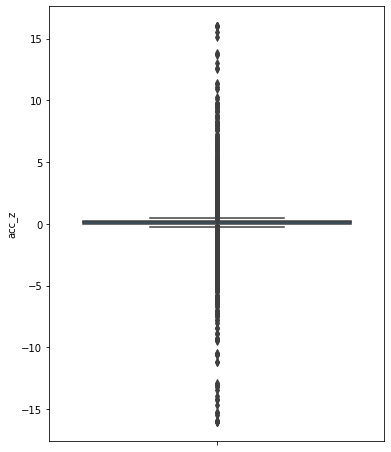

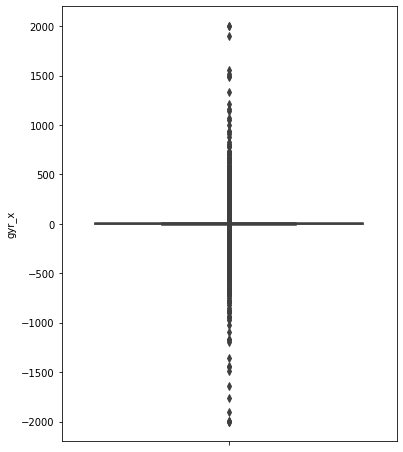

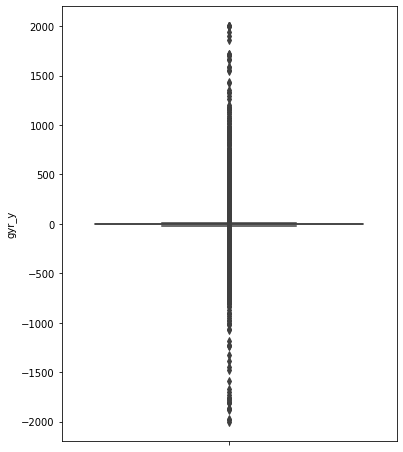

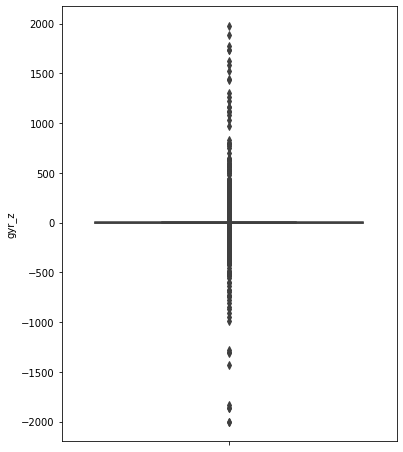

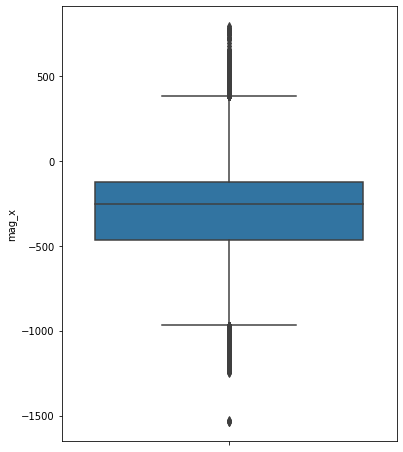

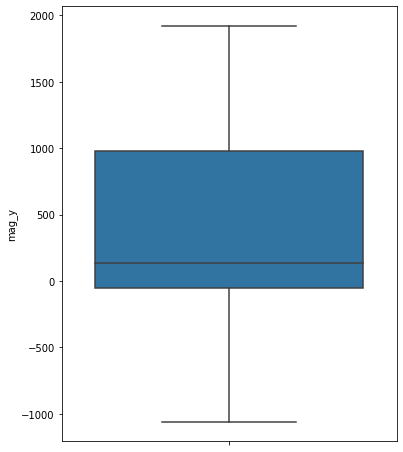

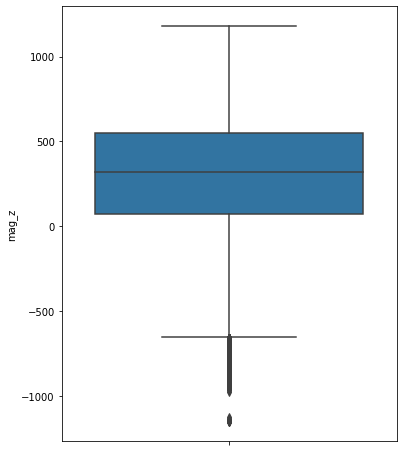

In [20]:
identify_outliers(x, column_name)

#creating funciton to replace outlier values with the median value
#IQR
def replace_outlier(x, col_name):
        Q1 = np.percentile(x[col_name], 25)
        Q2 = np.percentile(x[col_name], 50)
        Q3 = np.percentile(x[col_name], 75)
        IQR = Q3 - Q1

        upper_val = Q3 + (1.5 * IQR)
        print('upper', upper_val)
        lower_val = Q1 - (1.5 * IQR)
        print('lower', lower_val)

        x.loc[x[col_name] > upper_val, col_name] = np.median(x[col_name])
        x.loc[x[col_name] < lower_val, col_name] = np.median(x[col_name])
        
        fig = plt.figure(figsize = (6,8))
        sns.boxplot(data = x,y = col_name)
        plt.xticks(rotation = 'horizontal')
        plt.show()

In [21]:
def replace_outlier(x, column_name):
    for i in column_name:
        print('column name : ',i)
        Q1 = np.percentile(x[i], 25)
        Q2 = np.percentile(x[i], 50)
        Q3 = np.percentile(x[i], 75)
        IQR = Q3 - Q1
        print('Q1 =',Q1,'Q2 = ',Q2,'Q3 = ',Q3)

        upper_val = Q3 + (1.5 * IQR)
        print('upper', upper_val)
        lower_val = Q1 - (1.5 * IQR)
        print('lower', lower_val)

        x.loc[x[i] > upper_val, i] = np.median(x[i])
        x.loc[x[i] < lower_val, i] = np.median(x[i])
        
        fig = plt.figure(figsize = (6,8))
        sns.boxplot(data = x,y = i)
        plt.xticks(rotation = 'horizontal')
        plt.show()

column name :  time
Q1 = 1628105948.0 Q2 =  1628312235.0 Q3 =  1628335043.0
upper 1628678685.5
lower 1627762305.5


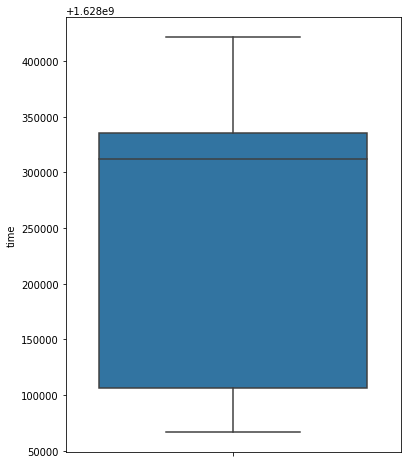

column name :  acc_x
Q1 = -0.2182617000000001 Q2 =  -0.0249023 Q3 =  0.1616211
upper 0.7314453000000001
lower -0.7880859000000002


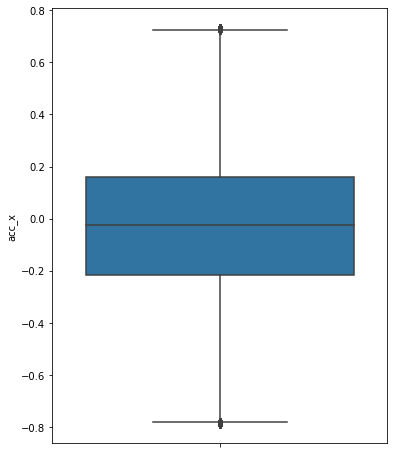

column name :  acc_y
Q1 = 0.828125 Q2 =  0.9370118 Q3 =  0.9736329
upper 1.1918947500000001
lower 0.60986315


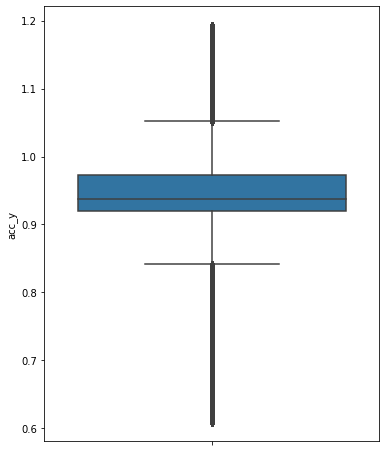

column name :  acc_z
Q1 = 0.0317383 Q2 =  0.1230469 Q3 =  0.2006836
upper 0.45410154999999996
lower -0.22167965


column name :  gyr_x
Q1 = -2.0141601 Q2 =  0.8544921999999998 Q3 =  3.7231445
upper 12.329101399999999
lower -10.620116999999999


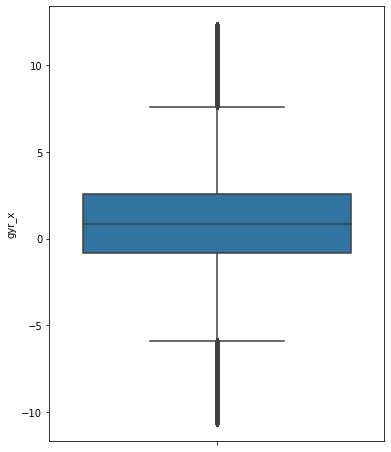

column name :  gyr_y
Q1 = -5.6762695 Q2 =  -1.8920898 Q3 =  1.8920898
upper 13.24462875
lower -17.02880845


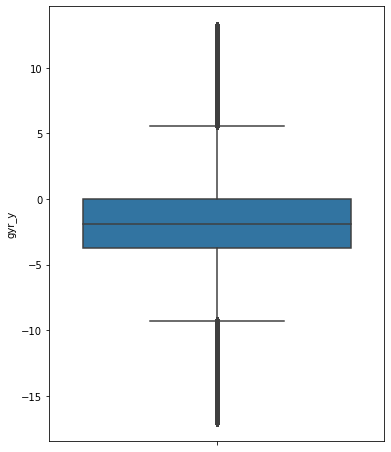

column name :  gyr_z
Q1 = -2.6855469 Q2 =  -0.6103516 Q3 =  1.4648437
upper 7.6904296
lower -8.911132799999999


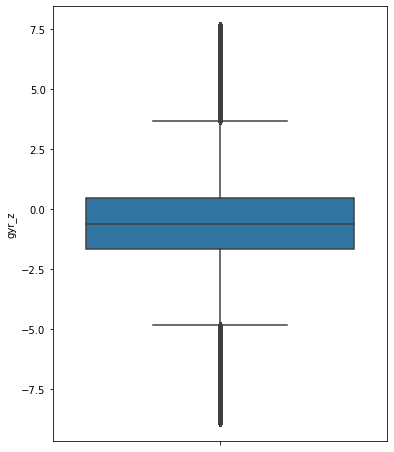

column name :  mag_x
Q1 = -463.5 Q2 =  -253.5 Q3 =  -126.0
upper 380.25
lower -969.75


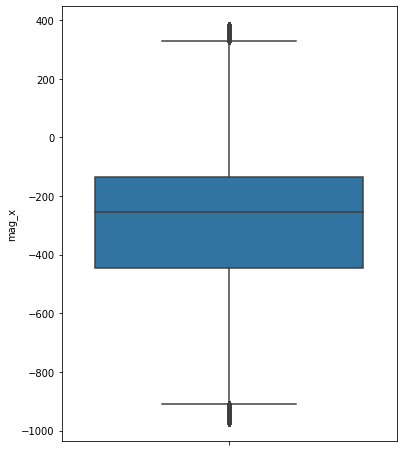

column name :  mag_y
Q1 = -49.5 Q2 =  139.5 Q3 =  979.5
upper 2523.0
lower -1593.0


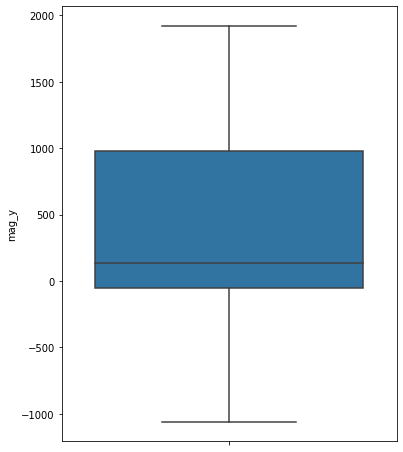

column name :  mag_z
Q1 = 69.0 Q2 =  316.5 Q3 =  552.0
upper 1276.5
lower -655.5


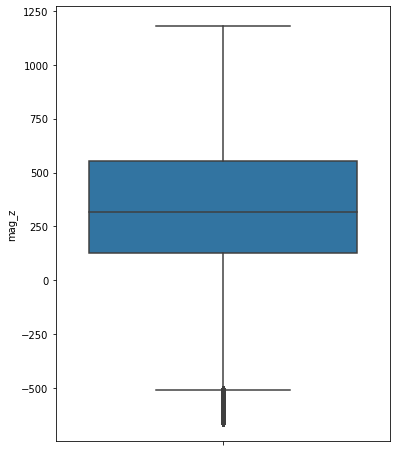

In [22]:
replace_outlier(x, column_name)

### looking for outliers after imputing with median

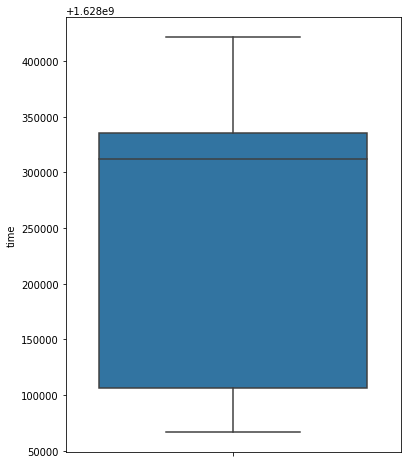

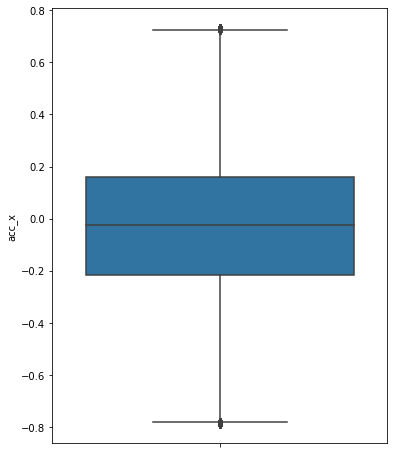

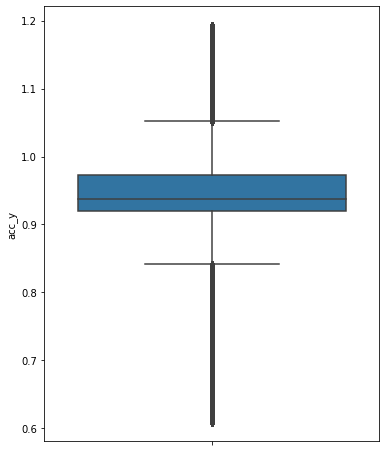

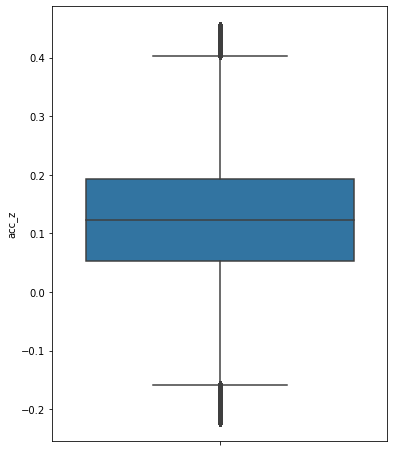

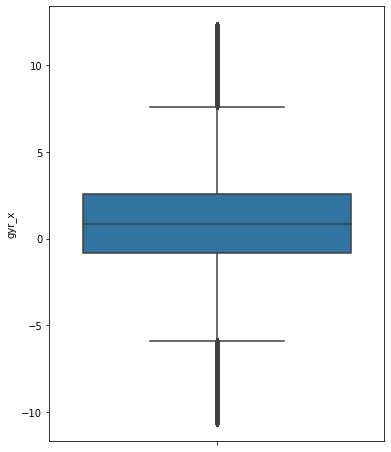

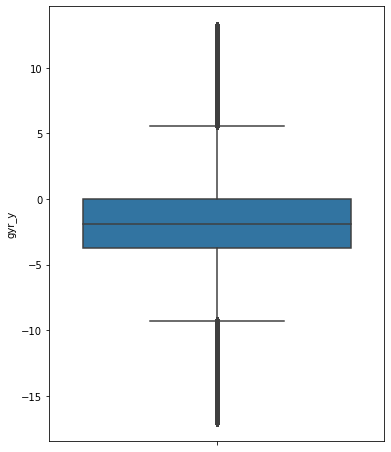

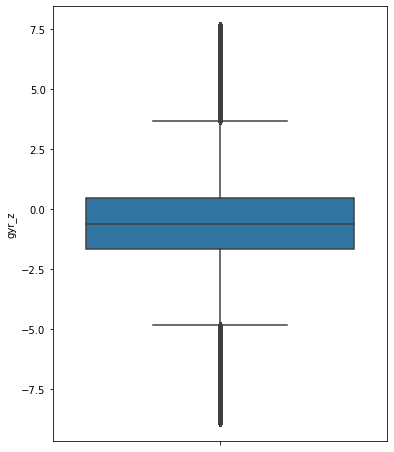

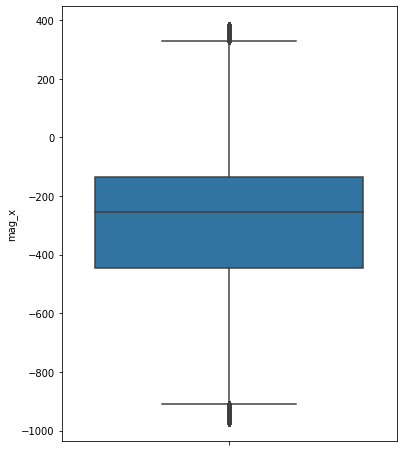

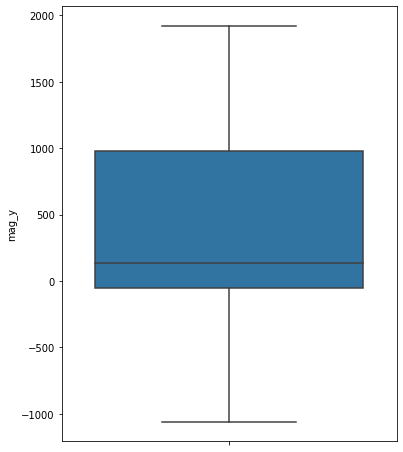

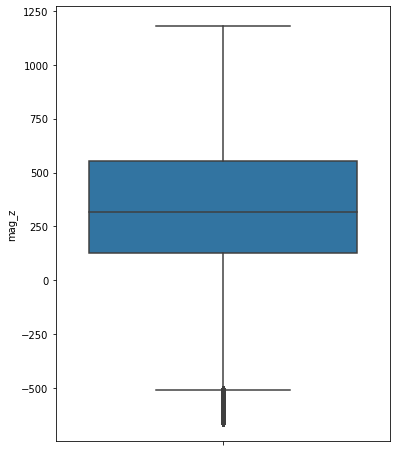

In [23]:
identify_outliers(x, column_name)

## Normalization to avoid negative values in data set


#### Normalization

All three (Acc, Gyr, Mag) gives output in different SI Units i.e The scale for all three are different, so Data must be normalized

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

In [25]:
scaling.fit_transform(x)

array([[0.03725611, 0.3953713 , 0.79278516, ..., 0.32814238, 0.83820565,
        0.6369583 ],
       [0.03725611, 0.42815819, 0.84060391, ..., 0.32703003, 0.83366935,
        0.62714636],
       [0.03725611, 0.53712634, 0.76258386, ..., 0.3403782 , 0.83215726,
        0.62142273],
       ...,
       [0.93311879, 0.71681137, 0.51761761, ..., 0.25695217, 0.65272177,
        0.47751431],
       [0.93311879, 0.71713276, 0.53355714, ..., 0.25806452, 0.66078629,
        0.46197874],
       [0.93311879, 0.71681137, 0.51761761, ..., 0.24026696, 0.6577621 ,
        0.4627964 ]])

In [26]:
#converting normalized values to data frame
x_normalized = pd.DataFrame(scaling.fit_transform(x))
x_normalized.head(3)

0         1         2         3         4    5    6         7  \
0  0.037256  0.395371  0.792785  0.803907  0.810160  0.5  0.5  0.328142   
1  0.037256  0.428158  0.840604  0.764834  0.475936  0.5  0.5  0.327030   
2  0.037256  0.537126  0.762584  0.647612  0.058824  0.5  0.5  0.340378   

          8         9  
0  0.838206  0.636958  
1  0.833669  0.627146  
2  0.832157  0.621423

### Feature Selection
#### Selecting KBest Features using chi2

In [27]:
#select k best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(x_normalized,y)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(x_normalized.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)
k_best_feature_rank.columns = ('features', 'k_score')

print(k_best_feature_rank.nlargest(6, 'k_score'))

   features        k_score
0         0  551696.294963
1         1  150058.553659
7         7  106664.110641
8         8   67694.199464
3         3   43636.740650
2         2   36914.462173


### From the chi2 we observed that the top 6 features are time, acc_x, mag_x, mag_y, acc_z, acc_y

## Creating new dataframe with normalized x and y

In [44]:
new_df = x_normalized
new_df['label'] = y.values
new_df


0         1         2         3         4         5  \
0         0.037256  0.395371  0.792785  0.803907  0.810160  0.500000   
1         0.037256  0.428158  0.840604  0.764834  0.475936  0.500000   
2         0.037256  0.537126  0.762584  0.647612  0.058824  0.500000   
3         0.037256  0.618451  0.603188  0.633864  0.500000  0.500000   
4         0.037256  0.631308  0.469799  0.693922  0.459893  0.500000   
...            ...       ...       ...       ...       ...       ...   
12263519  0.933119  0.713918  0.513423  0.762663  0.462567  0.497976   
12263520  0.933119  0.715204  0.525168  0.764110  0.489305  0.475709   
12263521  0.933119  0.716811  0.517618  0.765557  0.508021  0.471660   
12263522  0.933119  0.717133  0.533557  0.749638  0.550802  0.467611   
12263523  0.933119  0.716811  0.517618  0.756150  0.502674  0.485830   

                 6         7         8         9  label  
0         0.500000  0.328142  0.838206  0.636958      2  
1         0.500000  0.327030  0.833669  0.627146      2  
2         0.500000  0.340378  0.832157  0.621423      2  
3         0.837037  0.325918  0.835181  0.627964      2  
4         0.374074  0.328142  0.832661  0.632870      2  
...            ...       ...       ...       ...    ...  
12263519  0.751852  0.241379  0.651210  0.467702      4  
12263520  0.692593  0.245829  0.658770  0.475061      4  
12263521  0.725926  0.256952  0.652722  0.477514      4  
12263522  0.759259  0.258065  0.660786  0.461979      4  
12263523  0.711111  0.240267  0.657762  0.462796      4  

[12263524 rows x 11 columns]

In [53]:
new_df.columns = ['time','acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x','mag_y', 'mag_z','label']

# 4.Modelling

### As the dataset is huge 
#### 1 . Lets perform sampling on population data
#### 2 . Build different models on different samples
#### 3 . Check accuracy of each models and choose the best. 

#### DF1 - Sample - Logistic regression

In [55]:
# taking a sample of 60,000
import random
df1 = new_df.sample(60000)
df1.shape

(60000, 11)

In [56]:
df1.head()

time     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
2812302  0.934404  0.426230  0.330537  0.472504  0.500000  0.842105  0.500000   
3935259  0.681096  0.490518  0.934564  0.604920  0.887701  0.010121  0.470370   
2082703  0.060169  0.362584  0.522651  0.641100  0.751337  0.947368  0.500000   
3696435  0.746571  0.829958  0.084732  0.573806  0.500000  0.500000  0.429630   
5623195  0.045589  0.708132  0.568792  0.737337  0.465241  0.530364  0.518519   

            mag_x     mag_y     mag_z  label  
2812302  0.556174  0.384073  0.470155      1  
3935259  0.634038  0.397177  0.575634      8  
2082703  0.619577  0.367440  0.415372      1  
3696435  0.359288  0.767641  0.493868      8  
5623195  0.530590  0.648690  0.467702      5

In [57]:
df1['label'].value_counts()


1    16671
4    12667
7     9242
5     8358
6     8320
9     1949
8     1821
3      692
2      280
Name: label, dtype: int64

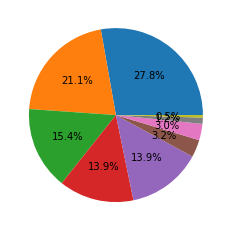

In [58]:
#check distribution of sample df1
plt.pie(df1['label'].value_counts(), autopct = '%1.1f%%');


In [59]:
#importing libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
#for confusion matrix
import scikitplot as skplot
# for smote
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

Data Balancing using SMOTE : In order to cope with imbalanced data, there are 2 options :

Undersampling : Trim down the majority samples of the target variable

Oversampling : Increase the minority samples of the target variable to the majority samples. 
we go with oversampling beacuse we might lose data if we do undersampling
For data balancing, we will use imblearn.

In [60]:
# Splitting x and y variables
x1 = df1[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y1 = df1['label'] #dependent features


In [61]:
print(x1.shape,y1.shape)

(60000, 6) (60000,)


In [62]:
#splitting the data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state=0)
print(x1_train.shape, y1_train.shape, x1_test.shape)
print('Classes and number of values in trainset before SMOTE:',Counter(y1_train),'\n')

# applying smote to handle imbalance in the target variable
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x1_train,y1_train = oversample.fit_resample(x1_train,y1_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y1_train),'\n')

# importing Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 1000, multi_class = 'multinomial',penalty = 'none')

#fitting the logistic regression model to x1_train and y1_train
classifier_lr.fit(x1_train, y1_train)
y1_pred = classifier_lr.predict(x1_test)
print('model.predict :',y1_pred)
print('model.score :', classifier_lr.score(x1_train, y1_train))

#accuracy_score
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y1_test, y1_pred)
print('Accuracy : ',accuracy_lr)
from sklearn.model_selection import cross_val_score
cv_scores_lr = cross_val_score(classifier_lr, x1, y1, cv=5)
print('Cross Validation scores :', cv_scores_lr)
mean_cv_lr = (np.mean(cv_scores_lr))*100
print('Mean cv :',mean_cv_lr)

(42000, 6) (42000,) (18000, 6)
Classes and number of values in trainset before SMOTE: Counter({1: 11702, 4: 8816, 7: 6510, 5: 5823, 6: 5804, 9: 1373, 8: 1291, 3: 487, 2: 194}) 

Classes and number of values in trainset after SMOTE: Counter({4: 11702, 1: 11702, 6: 11702, 5: 11702, 7: 11702, 8: 11702, 9: 11702, 3: 11702, 2: 11702}) 

model.predict : [9 4 7 ... 8 6 7]
model.score : 0.3620938491046165
Accuracy :  0.3252777777777778
Cross Validation scores : [0.42383333 0.427      0.42266667 0.41941667 0.423     ]
Mean cv : 42.318333333333335


In [63]:
#f1_score
f1_score_lr = f1_score(y1_test, y1_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_lr))
#precision
precision_score_lr = precision_score(y1_test, y1_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_lr))
#recall
recall_score_lr = recall_score(y1_test, y1_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_lr))


F1-score (average = weighted): 0.33
Precision (average = weighted): 0.44
Recall (average = weighted): 0.33


1. F1 score
average = 'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

2. precison
average = 'weighted'
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

3. recall
average = 'weighted'
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall. Weighted recall is equal to accuracy.

#### DF2 - Sample 2 - Decision Tree Classifier

In [65]:
import random
df2 = new_df.sample(60000)
df2.shape

(60000, 11)

In [66]:
df2['label'].value_counts()

1    16611
4    12520
7     9478
5     8371
6     8269
9     1985
8     1788
3      730
2      248
Name: label, dtype: int64

In [67]:
#distribution of sample df2
plt.pie(df2['label'].value_counts(), autopct = '%1.1f%%');


In [68]:
# Splitting x and y variables
x2 = df2[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent feat
y2 = df2['label'] #dependent features
print(x2.shape, y2.shape)


(60000, 6) (60000,)


In [69]:
#splitting the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)
print(x2_train.shape, y2_train.shape, x2_test.shape)
print('Classes and number of values in trainset before SMOTE:',Counter(y2_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x2_train,y2_train = oversample.fit_resample(x2_train,y2_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y2_train),'\n')

#importing Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(random_state=1000,max_depth=15,min_samples_leaf = 1)

classifier_dtc.fit(x2_train, y2_train)
y2_pred = classifier_dtc.predict(x2_test)
print('model.predict :',y2_pred)
print('model.score :', classifier_dtc.score(x2_train, y2_train))

from sklearn.metrics import accuracy_score
accuracy_dtc = accuracy_score(y2_test, y2_pred)
print('Accuracy : ',accuracy_dtc)

from sklearn.model_selection import cross_val_score
cv_scores_dtc = cross_val_score(classifier_dtc, x2, y2, cv=5)
print('Cross Validation scores :', cv_scores_dtc)

mean_cv_dtc = (np.mean(cv_scores_dtc))*100
print('Mean cv :',mean_cv_dtc)

(42000, 6) (42000,) (18000, 6)
Classes and number of values in trainset before SMOTE: Counter({1: 11653, 4: 8684, 7: 6675, 5: 5864, 6: 5840, 9: 1336, 8: 1278, 3: 500, 2: 170}) 

Classes and number of values in trainset after SMOTE: Counter({1: 11653, 6: 11653, 4: 11653, 7: 11653, 5: 11653, 8: 11653, 9: 11653, 3: 11653, 2: 11653}) 

model.predict : [4 5 5 ... 5 5 8]
model.score : 0.9563202608770274
Accuracy :  0.9136111111111112
Cross Validation scores : [0.94375    0.93966667 0.94025    0.94266667 0.94583333]
Mean cv : 94.24333333333334


In [70]:
f1_score_dtc = f1_score(y2_test, y2_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_dtc))

precision_score_dtc = precision_score(y2_test, y2_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_dtc))

recall_score_dtc = recall_score(y2_test, y2_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_dtc))

F1-score (average = weighted): 0.92
Precision (average = weighted): 0.92
Recall (average = weighted): 0.91


#### DF3 - Sample 3 - Random Forest Classifier

In [71]:
import random
df3 = new_df.sample(60000)

In [72]:
df3['label'].value_counts()

1    16801
4    12477
7     9377
5     8420
6     8127
9     1961
8     1840
3      704
2      293
Name: label, dtype: int64

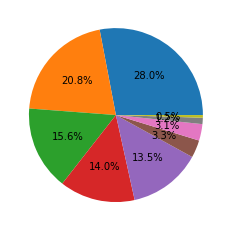

In [73]:
#distribution of sample df3
plt.pie(df3['label'].value_counts(), autopct = '%1.1f%%');

In [74]:
# Splitting x and y variables
x3 = df3[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y3 = df3['label'] #dependent features
print(x3.shape, y3.shape)

(60000, 6) (60000,)


In [75]:
#splitting the data
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y3_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x3_train,y3_train = oversample.fit_resample(x3_train,y3_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y3_train),'\n')

#import random forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=20, random_state=23)

classifier_rf.fit(x3_train, y3_train)
y3_pred = classifier_rf.predict(x3_test)
print('model.predict :',y3_pred)
print('model.score :', classifier_rf.score(x3_train, y3_train))

from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y3_test, y3_pred)
print('Accuracy : ',accuracy_rf)

from sklearn.model_selection import cross_val_score
cv_scores_rf = cross_val_score(classifier_rf, x3, y3, cv=5)
print('Cross Validation scores :', cv_scores_rf)

mean_accuracy_rf = (np.mean(cv_scores_rf))*100
print('Mean Accuracy :',mean_accuracy_rf)

Classes and number of values in trainset before SMOTE: Counter({1: 11731, 4: 8690, 7: 6576, 5: 5934, 6: 5693, 9: 1404, 8: 1266, 3: 503, 2: 203}) 

Classes and number of values in trainset after SMOTE: Counter({7: 11731, 4: 11731, 6: 11731, 3: 11731, 1: 11731, 5: 11731, 9: 11731, 8: 11731, 2: 11731}) 

model.predict : [5 5 1 ... 4 1 1]
model.score : 0.9997821536479793
Accuracy :  0.9301666666666667
Cross Validation scores : [0.95191667 0.94875    0.949      0.94925    0.94858333]
Mean Accuracy : 94.94999999999999


In [76]:
f1_score_rf = f1_score(y3_test, y3_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_rf))

precision_score_rf = precision_score(y3_test, y3_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_rf))

recall_score_rf = recall_score(y3_test, y3_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_rf))

F1-score (average = weighted): 0.93
Precision (average = weighted): 0.93
Recall (average = weighted): 0.93


### DF4 - Sample 4 - Support Vector Classifier

In [77]:
import random
df4 = new_df.sample(60000)

In [78]:
df4['label'].value_counts()

1    16720
4    12528
7     9410
6     8346
5     8177
9     1999
8     1809
3      754
2      257
Name: label, dtype: int64

In [79]:
#distribution of sample df4
plt.pie(df4['label'].value_counts(), autopct = '%1.1f%%');

In [80]:
# Splitting x and y variables
x4 = df4[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y4 = df4['label'] #dependent features
print(x4.shape, y4.shape)

(60000, 6) (60000,)


In [81]:
#splitting the data
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y4_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x4_train,y4_train = oversample.fit_resample(x4_train,y4_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y4_train),'\n')

#importing svc
from sklearn.svm import SVC
classifier_svc=SVC(decision_function_shape='ovo')


classifier_svc.fit(x4_train, y4_train)
y4_pred = classifier_svc.predict(x4_test)
print('model.predict :',y4_pred)
print('model.score :', classifier_svc.score(x4_train, y4_train))

from sklearn.metrics import accuracy_score
accuracy_svc = accuracy_score(y4_test, y4_pred)
print('Accuracy : ',accuracy_svc)

from sklearn.model_selection import cross_val_score
cv_scores_svc = cross_val_score(classifier_svc, x4, y4, cv=5)
print('Cross Validation scores :', cv_scores_svc)

mean_cv_svc = (np.mean(cv_scores_svc))*100
print('Mean cv :',mean_cv_svc)

Classes and number of values in trainset before SMOTE: Counter({1: 11640, 4: 8793, 7: 6607, 6: 5874, 5: 5725, 9: 1385, 8: 1263, 3: 528, 2: 185}) 

Classes and number of values in trainset after SMOTE: Counter({1: 11640, 9: 11640, 4: 11640, 7: 11640, 6: 11640, 2: 11640, 5: 11640, 8: 11640, 3: 11640}) 

model.predict : [4 6 5 ... 5 1 5]
model.score : 0.7560519282168767
Accuracy :  0.6985555555555556
Cross Validation scores : [0.7295     0.73041667 0.72308333 0.72641667 0.73216667]
Mean cv : 72.83166666666666


In [82]:
f1_score_svc = f1_score(y4_test, y4_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_svc))

precision_score_svc = precision_score(y4_test, y4_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_svc))

recall_score_svc = recall_score(y4_test, y4_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_svc))

F1-score (average = weighted): 0.71
Precision (average = weighted): 0.74
Recall (average = weighted): 0.70


### DF5 - Sample 5 - KNearest Neighbors

In [83]:
import random
df5 = new_df.sample(60000)

In [84]:
df5['label'].value_counts()

1    16558
4    12572
7     9530
5     8343
6     8189
9     2050
8     1812
3      674
2      272
Name: label, dtype: int64

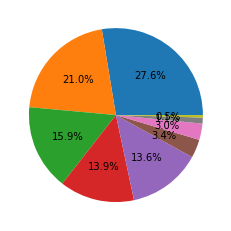

In [85]:
#distribution of sample df5
plt.pie(df5['label'].value_counts(), autopct = '%1.1f%%');

In [86]:
# Splitting x and y variables
x5 = df5[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y5 = df5['label'] #dependent features

In [87]:
#splitting the data
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y5_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x5_train,y5_train = oversample.fit_resample(x5_train,y5_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y5_train),'\n')

#importing kneighbours classifier
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier()

classifier_knn.fit(x5_train, y5_train)
y5_pred = classifier_knn.predict(x5_test)
print('model.predict :',y5_pred)
print('model.score :', classifier_knn.score(x5_train, y5_train))

from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y5_test, y5_pred)
print('Accuracy : ',accuracy_knn)

from sklearn.model_selection import cross_val_score
cv_scores_knn = cross_val_score(classifier_knn, x5, y5, cv=5)
print('Cross Validation scores :', cv_scores_knn)

mean_cv_knn = (np.mean(cv_scores_knn))*100
print('Mean cv :',mean_cv_knn)

Classes and number of values in trainset before SMOTE: Counter({1: 11589, 4: 8839, 7: 6672, 5: 5803, 6: 5768, 9: 1418, 8: 1263, 3: 470, 2: 178}) 

Classes and number of values in trainset after SMOTE: Counter({5: 11589, 6: 11589, 1: 11589, 4: 11589, 7: 11589, 9: 11589, 8: 11589, 3: 11589, 2: 11589}) 

model.predict : [4 9 1 ... 4 5 7]
model.score : 0.9424358347475096
Accuracy :  0.7867777777777778
Cross Validation scores : [0.81833333 0.81466667 0.81408333 0.80991667 0.8095    ]
Mean cv : 81.33000000000001


In [88]:
f1_score_knn = f1_score(y5_test, y5_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_knn))

precision_score_knn = precision_score(y5_test, y5_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_knn))

recall_score_knn = recall_score(y5_test, y5_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_knn))

F1-score (average = weighted): 0.79
Precision (average = weighted): 0.80
Recall (average = weighted): 0.79


### Sample 6 - df6 - AdaBoost Classifier

In [89]:
import random
df6 = new_df.sample(60000)

In [90]:
df6['label'].value_counts()

1    16857
4    12338
7     9308
5     8417
6     8363
9     1928
8     1795
3      727
2      267
Name: label, dtype: int64

In [91]:
#distribution of sample df6
plt.pie(df6['label'].value_counts(), autopct = '%1.1f%%');

In [92]:
# Splitting x and y variables
x6 = df6[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']] #independent features
y6 = df6['label'] #dependent features

In [93]:
###### splitting the data
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.3, random_state = 0)
print('Classes and number of values in trainset before SMOTE:',Counter(y6_train),'\n')

#smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x6_train,y6_train = oversample.fit_resample(x6_train,y6_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y6_train),'\n')


from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier()

classifier_ada.fit(x6_train, y6_train)
y6_pred = classifier_ada.predict(x6_test)
print('model.predict :',y6_pred)
print('model.score :', classifier_ada.score(x6_train, y6_train))

from sklearn.metrics import accuracy_score
accuracy_ada = accuracy_score(y6_test, y6_pred)
print('Accuracy : ',accuracy_ada)

from sklearn.model_selection import cross_val_score
cv_scores_ada = cross_val_score(classifier_ada, x6, y6, cv=5)
print('Cross Validation scores :', cv_scores_ada)

mean_cv_ada = (np.mean(cv_scores_ada))*100
print('Mean cv :',mean_cv_ada)

Classes and number of values in trainset before SMOTE: Counter({1: 11756, 4: 8713, 7: 6533, 6: 5951, 5: 5785, 9: 1297, 8: 1255, 3: 512, 2: 198}) 

Classes and number of values in trainset after SMOTE: Counter({4: 11756, 5: 11756, 1: 11756, 7: 11756, 6: 11756, 8: 11756, 9: 11756, 3: 11756, 2: 11756}) 

model.predict : [4 8 2 ... 7 1 6]
model.score : 0.46370647612566634
Accuracy :  0.4255555555555556
Cross Validation scores : [0.51008333 0.51258333 0.54725    0.50591667 0.50216667]
Mean cv : 51.559999999999995


In [94]:
f1_score_ada = f1_score(y6_test, y6_pred, average='weighted')
print('F1-score (average = weighted): {:.2f}'.format(f1_score_ada))

precision_score_ada = precision_score(y6_test, y6_pred, average='weighted')
print('Precision (average = weighted): {:.2f}'.format(precision_score_ada))

recall_score_ada = recall_score(y6_test, y6_pred, average='weighted')
print('Recall (average = weighted): {:.2f}'.format(recall_score_ada))

F1-score (average = weighted): 0.45
Precision (average = weighted): 0.53
Recall (average = weighted): 0.43


## MAKING A DATAFRAME OF ALL THE SCORES FOR EVERY MODEL BUILT

In [95]:
#Making a dataframe of all the scores for every model
scores = [("Logistic Regression", accuracy_lr,mean_cv_lr, f1_score_lr,precision_score_lr,recall_score_lr),
           ("Decision Tree",accuracy_dtc,mean_cv_dtc, f1_score_dtc,precision_score_dtc,recall_score_dtc),
           ("Random Forest", accuracy_rf,mean_accuracy_rf, f1_score_rf,precision_score_rf,recall_score_rf),
           ("KNN", accuracy_knn,mean_cv_knn, f1_score_knn,precision_score_knn,recall_score_knn),
           ('Support vector machine',accuracy_svc,mean_cv_svc, f1_score_svc,precision_score_svc,recall_score_svc),
           ('AdaBoost Classifier',accuracy_ada,mean_cv_ada, f1_score_ada,precision_score_ada,recall_score_ada)]

Scores =pd.DataFrame(data = scores, columns=['Model Name','Test Accuracy','Mean Cross validation score', 'F1 Score', 'Precision', 'Recall'])
Scores.set_index('Model Name', inplace = True)

In [96]:
Scores.style.background_gradient(cmap='YlGn')

### Conclusion: Random Forest gives the highest accuracy .
### AdaBoost gives the lowest accuracy